<a href="https://colab.research.google.com/github/Ritik21-prog/DL/blob/main/102015093_Ritik_Nagpal_3ENC5_DL_Lab_Sheet_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submitted By-Ritik Nagpal 
Roll No-102015093
Class-3ENC5

# Deep Learning Assignment 8

# **LSTM**

In [1]:
import torch
import torch.nn as nn
import numpy as np

Explore the LSTM type


In [2]:
# set layer parameters
input_size = 9 # number of features to extract (e.g., number of data channels)
hidden_size = 16 # number of units in the hidden state
num_layers = 2 # number of vertical stacks of hidden layers (note: only the final layer gives an output)

In [3]:
# create an LSTM instance
lstm = nn.LSTM(input_size,hidden_size,num_layers)
lstm


LSTM(9, 16, num_layers=2)

In [4]:
# check out the source code for more detailed info about this class
nn.LSTM

torch.nn.modules.rnn.LSTM

In [5]:
# set data parameters
seqlength = 5
batchsize = 2

In [6]:
# create some data
X = torch.rand(seqlength,batchsize,input_size)

In [7]:
# create some data
X = torch.rand(seqlength,batchsize,input_size)

In [8]:
# create initial hidden states (typically initialized as zeros)
H = torch.zeros(num_layers,batchsize,hidden_size)
C = torch.zeros(num_layers,batchsize,hidden_size)

In [9]:
# the input is actually a tuple of (hidden,cell)
hiddeninputs = (H,C)


In [10]:
# run some data through the model and show the output sizes
y,h = lstm(X,hiddeninputs)
print(f' Input shape: {list(X.shape)}')
print(f'Hidden shape: {list(h[0].shape)}')
print(f' Cell shape: {list(h[1].shape)}')
print(f'Output shape: {list(y.shape)}')


 Input shape: [5, 2, 9]
Hidden shape: [2, 2, 16]
 Cell shape: [2, 2, 16]
Output shape: [5, 2, 16]


In [11]:
# Check out the learned parameters and their sizes
for p in lstm.named_parameters():
 if 'weight' in p[0]:
  print(f'{p[0]} has size {list(p[1].shape)}')

weight_ih_l0 has size [64, 9]
weight_hh_l0 has size [64, 16]
weight_ih_l1 has size [64, 16]
weight_hh_l1 has size [64, 16]


Create a DL model class

In [12]:
class LSTMnet(nn.Module):
  def __init__(self,input_size,num_hidden,num_layers):
   super().__init__()
   # store parameters
   self.input_size = input_size
   self.num_hidden = num_hidden
   self.num_layers = num_layers

   # RNN Layer (notation: LSTM \in RNN)
   self.lstm = nn.LSTM(input_size,num_hidden,num_layers)

   # linear layer for output
   self.out = nn.Linear(num_hidden,1)

  def forward(self,x):

    print(f'Input: {list(x.shape)}')
    # run through the RNN layer
    y,hidden = self.lstm(x)
    print(f'RNN-out: {list(y.shape)}')
    print(f'RNN-hidden: {list(hidden[0].shape)}')
    print(f'RNN-cell: {list(hidden[1].shape)}')
    # pass the RNN output through the linear output layer
    o = self.out(y)
    print(f'Output: {list(o.shape)}')
    return o,hidden
  
# create an instance of the model and inspect
net = LSTMnet(input_size,hidden_size,num_layers)
print(net), print(' ')
# create an instance of the model and inspect
net = LSTMnet(input_size,hidden_size,num_layers)
print(net), print(' ')
# test the model with some data
# create some data
X = torch.rand(seqlength,batchsize,input_size)
y = torch.rand(seqlength,batchsize,1)
yHat,h = net(X)

lossfun = nn.MSELoss()
lossfun(yHat,y)


LSTMnet(
  (lstm): LSTM(9, 16, num_layers=2)
  (out): Linear(in_features=16, out_features=1, bias=True)
)
 
LSTMnet(
  (lstm): LSTM(9, 16, num_layers=2)
  (out): Linear(in_features=16, out_features=1, bias=True)
)
 
Input: [5, 2, 9]
RNN-out: [5, 2, 16]
RNN-hidden: [2, 2, 16]
RNN-cell: [2, 2, 16]
Output: [5, 2, 1]


tensor(0.3449, grad_fn=<MseLossBackward0>)

# **GRU**

In [13]:
# create a GRU instance
gru = nn.GRU(input_size,hidden_size,num_layers)
gru
??nn.GRU


In [14]:
# create some data and a hidden state
X = torch.rand(seqlength,batchsize,input_size)
H = torch.zeros(num_layers,batchsize,hidden_size)


In [15]:
# run some data through the model and show the output sizes
y,h = gru(X,H) # No cell states in GRU!
print(f' Input shape: {list(X.shape)}')
print(f'Hidden shape: {list(h.shape)}')
print(f'Output shape: {list(y.shape)}')


 Input shape: [5, 2, 9]
Hidden shape: [2, 2, 16]
Output shape: [5, 2, 16]


In [16]:
# Check out the learned parameters and their sizes
for p in gru.named_parameters():
 print(f'{p[0]:>15} has size {list(p[1].shape)}')


   weight_ih_l0 has size [48, 9]
   weight_hh_l0 has size [48, 16]
     bias_ih_l0 has size [48]
     bias_hh_l0 has size [48]
   weight_ih_l1 has size [48, 16]
   weight_hh_l1 has size [48, 16]
     bias_ih_l1 has size [48]
     bias_hh_l1 has size [48]


# RNN CLASS

Explore the RNN type

In [17]:
# set layer parameters
input_size = 9 # number of features to extract (e.g., number of data channels)
hidden_size = 16 # number of units in the hidden state
num_layers = 1 # number of vertical stacks of hidden layers (note: only the final layer gives an output)
actfun = 'tanh'
bias = True

In [18]:
# create an RNN instance
rnn = nn.RNN(input_size,hidden_size,num_layers,nonlinearity=actfun,bias=bias)
print(rnn)

RNN(9, 16)


In [19]:
# check out the source code for more detailed info about this class
??nn.RNN

In [20]:
# set data parameters
seqlength = 5
batchsize = 2

In [21]:
# create some data
X = torch.rand(seqlength,batchsize,input_size)


In [22]:
# create a hidden layer (typically initialized as zeros)
hidden = torch.zeros(num_layers,batchsize,hidden_size)


In [23]:
# run some data through the model and show the output sizes
y,h = rnn(X,hidden)
print(f' Input shape: {list(X.shape)}')
print(f'Hidden shape: {list(h.shape)}')
print(f'Output shape: {list(y.shape)}')

 Input shape: [5, 2, 9]
Hidden shape: [1, 2, 16]
Output shape: [5, 2, 16]


In [24]:
## Default hidden state is all zeros if nothing specified:
y,h1 = rnn(X,hidden)
print(h1), print('\n\n')

tensor([[[ 0.2215,  0.2504,  0.4442,  0.4058, -0.4935, -0.2961, -0.3241,
          -0.1926, -0.2351,  0.3223,  0.4482, -0.1302, -0.5340,  0.0247,
           0.2674, -0.1420],
         [ 0.1305,  0.1691,  0.2445,  0.4523, -0.6716, -0.2996, -0.5227,
          -0.3279, -0.1306,  0.2386,  0.4048, -0.2078, -0.5054,  0.0927,
           0.2997, -0.2844]]], grad_fn=<StackBackward0>)





(None, None)

In [25]:
y,h2 = rnn(X)
print(h2), print('\n\n')

tensor([[[ 0.2215,  0.2504,  0.4442,  0.4058, -0.4935, -0.2961, -0.3241,
          -0.1926, -0.2351,  0.3223,  0.4482, -0.1302, -0.5340,  0.0247,
           0.2674, -0.1420],
         [ 0.1305,  0.1691,  0.2445,  0.4523, -0.6716, -0.2996, -0.5227,
          -0.3279, -0.1306,  0.2386,  0.4048, -0.2078, -0.5054,  0.0927,
           0.2997, -0.2844]]], grad_fn=<StackBackward0>)





(None, None)

In [26]:
# they're the same! (meaning default=zeros)
print(h1-h2)


tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]],
       grad_fn=<SubBackward0>)


In [27]:
# Check out the learned parameters and their sizes
for p in rnn.named_parameters():
 if 'weight' in p[0]:
  print(f'{p[0]} has size {list(p[1].shape)}')

weight_ih_l0 has size [16, 9]
weight_hh_l0 has size [16, 16]


Create a DL model class


In [28]:
class RNNnet(nn.Module):
 def __init__(self,input_size,num_hidden,num_layers):
  super().__init__()

  # store parameters
  self.input_size = input_size
  self.num_hidden = num_hidden
  self.num_layers = num_layers

# RNN Layer
  self.rnn = nn.RNN(input_size,num_hidden,num_layers)

# linear layer for output
  self.out = nn.Linear(num_hidden,1)
 def forward(self,x):
  print(f'Input: {list(x.shape)}')

# initialize hidden state for first input
  hidden = torch.zeros(self.num_layers,batchsize,self.num_hidden)
  print(f'Hidden: {list(hidden.shape)}')

# run through the RNN layer
  y,hidden = self.rnn(x,hidden)
  print(f'RNN-out: {list(y.shape)}')
  print(f'RNN-hidden: {list(hidden.shape)}')

# pass the RNN output through the linear output layer
  o = self.out(y)
  print(f'Output: {list(o.shape)}')

  return o,hidden

# create an instance of the model and inspect
net = RNNnet(input_size,hidden_size,num_layers)
print(net), print(' ')

# and check out all learnable parameters
for p in net.named_parameters():
  print(f'{p[0]} has size {list(p[1].shape)}')

  # test the model with some data
  # create some data
  X = torch.rand(seqlength,batchsize,input_size)
  y = torch.rand(seqlength,batchsize,1)
  yHat,h = net(X)
  # try a loss function
  lossfun = nn.MSELoss()
  lossfun(yHat,y)


RNNnet(
  (rnn): RNN(9, 16)
  (out): Linear(in_features=16, out_features=1, bias=True)
)
 
rnn.weight_ih_l0 has size [16, 9]
Input: [5, 2, 9]
Hidden: [1, 2, 16]
RNN-out: [5, 2, 16]
RNN-hidden: [1, 2, 16]
Output: [5, 2, 1]
rnn.weight_hh_l0 has size [16, 16]
Input: [5, 2, 9]
Hidden: [1, 2, 16]
RNN-out: [5, 2, 16]
RNN-hidden: [1, 2, 16]
Output: [5, 2, 1]
rnn.bias_ih_l0 has size [16]
Input: [5, 2, 9]
Hidden: [1, 2, 16]
RNN-out: [5, 2, 16]
RNN-hidden: [1, 2, 16]
Output: [5, 2, 1]
rnn.bias_hh_l0 has size [16]
Input: [5, 2, 9]
Hidden: [1, 2, 16]
RNN-out: [5, 2, 16]
RNN-hidden: [1, 2, 16]
Output: [5, 2, 1]
out.weight has size [1, 16]
Input: [5, 2, 9]
Hidden: [1, 2, 16]
RNN-out: [5, 2, 16]
RNN-hidden: [1, 2, 16]
Output: [5, 2, 1]
out.bias has size [1]
Input: [5, 2, 9]
Hidden: [1, 2, 16]
RNN-out: [5, 2, 16]
RNN-hidden: [1, 2, 16]
Output: [5, 2, 1]


# **RNN_altSequences**

In [29]:
import sys
# for data visualization
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

<ipython-input-29-9cecd5a16a8f>:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


Create temporal sequence data

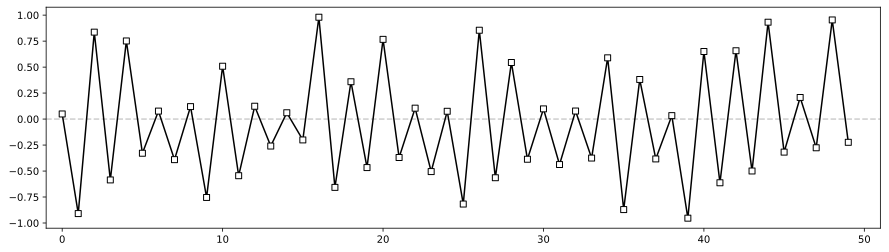

In [30]:
# import the data
N = 50
data = torch.zeros(N)
for i in range(N):
 data[i] = torch.rand(1) * (-1)**i
plt.figure(figsize=(15,4))
plt.plot([-1,N+1],[0,0],'--',color=[.8,.8,.8])
plt.plot(data,'ks-',markerfacecolor='w')
plt.xlim([-1,N+1])
plt.show()

Create a class for the DL model


In [31]:
class rnnnet(nn.Module):
 def __init__(self,input_size,num_hidden,num_layers):
  super().__init__()
  # RNN Layer
  self.rnn = nn.RNN(input_size,num_hidden,num_layers)
  # linear layer for output
  self.out = nn.Linear(num_hidden,1)
 def forward(self, x):
  # run through the RNN layer
  y,hidden = self.rnn(x) # no explicit hidden state initialization
  # and the output (linear) layer
  y = self.out(y)
  
  return y,hidden


In [32]:
# network parameters
input_size = 1 # "channels" of data
num_hidden = 5 # breadth of model (number of units in hidden layers)
num_layers = 1 # depth of model (number of "stacks" of hidden layers)
seqlength = 9 # number of datapoints used for learning in each segment
batchsize = 1 # Note: the training code is actually hard-coded to organize data into batchsize=1

In [33]:
# create an instance of the model and inspect
net = rnnnet(input_size,num_hidden,num_layers)
X = torch.rand(seqlength,batchsize,input_size)
y,h = net(X)
print(X.shape)
print(y.shape) # note: one output per sequence element; generally, we take the final output to force a "many-to-one" design.
print(h.shape)


torch.Size([9, 1, 1])
torch.Size([9, 1, 1])
torch.Size([1, 1, 5])


In [34]:
# test the model with some data
somedata = data[:seqlength].view(seqlength,1,1)
y = net(somedata)
# grab the final predicted value from the output (first element of tuple output of net)
finalValue = y[0][-1]
lossfun = nn.MSELoss()
lossfun(finalValue,data[seqlength].view(1,1))

tensor(0.7681, grad_fn=<MseLossBackward0>)

Train the model and show performance


In [35]:
# number of training epochs
numepochs = 30
# create a new instance of the model (and optimizer!)
net = rnnnet(input_size,num_hidden,num_layers)
optimizer = torch.optim.SGD(net.parameters(),lr=.001)


In [36]:
# initialize losses
losses = np.zeros(numepochs)
signaccuracy = np.zeros(numepochs)


Finished epoch 30/30

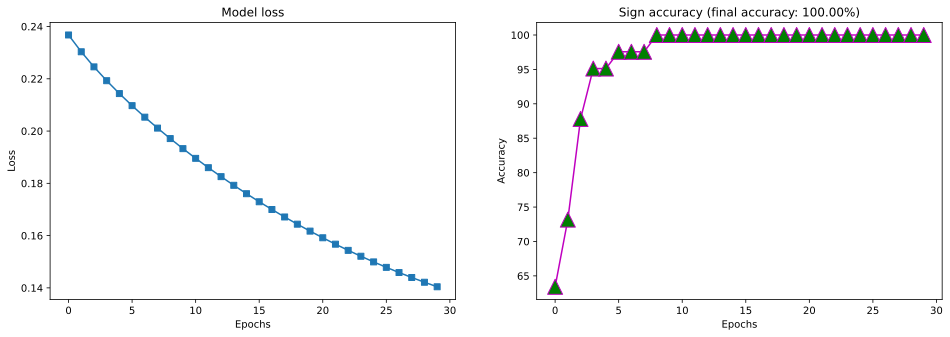

In [37]:
# loop over epochs
for epochi in range(numepochs):
 
 # loop over data segments
 seglosses = []
 segacc = []
 hidden_state = torch.zeros(num_layers,batchsize,num_hidden) # reset the hidden state on each epoch
 
 for timei in range(N-seqlength):
  # grab a snippet of data
  X = data[timei:timei+seqlength].view(seqlength,1,1)
  y = data[timei+seqlength].view(1,1)

  # forward pass and loss
  yHat,hidden_state = net(X)
  finalValue = yHat[-1]
  loss = lossfun(finalValue,y) # compare final value of output

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # loss from this segment
  seglosses.append(loss.item())

  # also get sign accuracy
  truesign = np.sign(torch.squeeze(y).numpy())
  predsign = np.sign(torch.squeeze(finalValue).detach().numpy())
  accuracy = 100*(truesign==predsign)
  segacc.append(accuracy)

 # average losses from this epoch
 losses[epochi] = np.mean(seglosses)
 signaccuracy[epochi] = np.mean(segacc)

 msg = f'Finished epoch {epochi+1}/{numepochs}'
 sys.stdout.write('\r' + msg)

truesign

## let's see how the model did!
fig,ax = plt.subplots(1,2,figsize=(16,5))
ax[0].plot(losses,'s-')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')
ax[1].plot(signaccuracy,'m^-',markerfacecolor='g',markersize=15)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Sign accuracy (final accuracy: %.2f%%)'%signaccuracy[-1])
plt.show()


Now test the network!


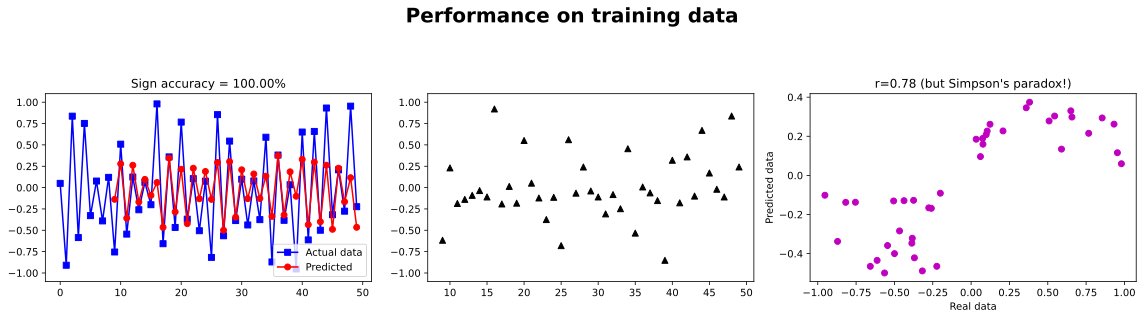

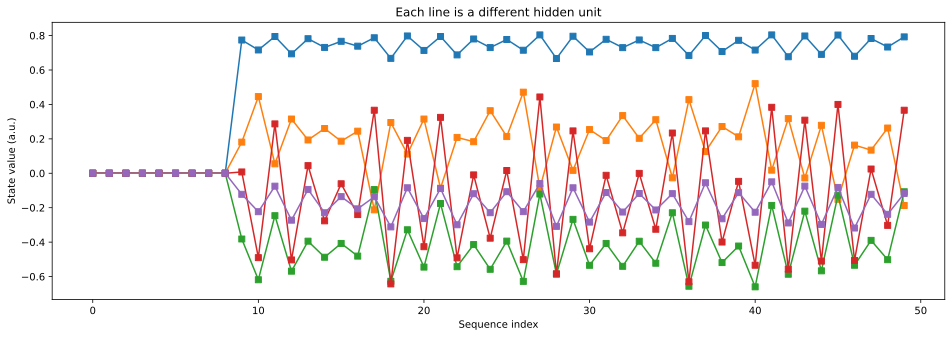

In [38]:
# initialize hidden state
h = np.zeros((N,num_hidden))
# initialize predicted values
yHat = np.zeros(N)
yHat[:] = np.nan
# loop over time segments
for timei in range(N-seqlength):
  # grab a snippet of data
  X = data[timei:timei+seqlength].view(seqlength,1,1)
  # forward pass and loss
  yy,hh = net(X)
  yHat[timei+seqlength] = yy[-1]
  h[timei+seqlength,:] = hh.detach()
## compute sign-accuracy
truesign = np.sign(data.numpy())
predsign = np.sign(yHat)
signaccuracy = 100*np.mean(truesign[seqlength:]==predsign[seqlength:])
## plot!
fig,ax = plt.subplots(1,3,figsize=(16,4))
ax[0].plot(data,'bs-',label='Actual data')
ax[0].plot(yHat,'ro-',label='Predicted')
ax[0].set_ylim([-1.1,1.1])
ax[0].set_title('Sign accuracy = %.2f%%' %signaccuracy)
ax[0].legend()
ax[1].plot(data-yHat,'k^')  
ax[1].set_ylim([-1.1,1.1])
ax[2].plot(data[seqlength:],yHat[seqlength:],'mo')
ax[2].set_xlabel('Real data')
ax[2].set_ylabel('Predicted data')
r = np.corrcoef(data[seqlength:],yHat[seqlength:])
ax[2].set_title(f"r={r[0,1]:.2f} (but Simpson's paradox!)")
plt.suptitle('Performance on training data',fontweight='bold',fontsize=20,y=1.1)
plt.tight_layout()
plt.show()
# show the hidden "states" (units activations)
plt.figure(figsize=(16,5))
plt.plot(h,'s-')
plt.xlabel('Sequence index')
plt.ylabel('State value (a.u.)')
plt.title('Each line is a different hidden unit')
plt.show()


Test with new data

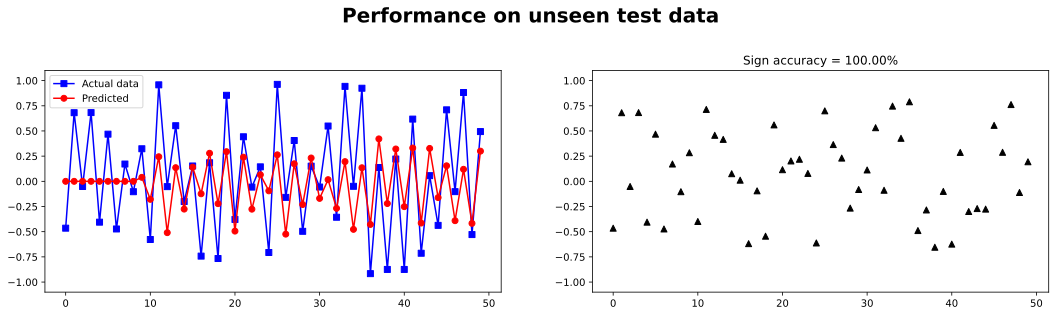

/usr/local/lib/python3.10/dist-packages/numpy/lib/stride_tricks.py:537: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/usr/local/lib/python3.10/dist-packages/numpy/lib/stride_tricks.py:537: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/usr/loc

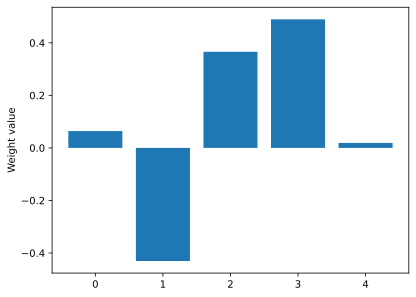

In [39]:
# Create new data WITH FLIPPED SIGNS!
newdata = torch.zeros(N)
for i in range(N):
  newdata[i] = torch.rand(1) * (-1)**(i+1)
## now test the network!
# note: no learning here!
h = np.zeros((N,num_hidden))
yHat = np.zeros(N)
for timei in range(N-seqlength):
  # grab a snippet of data
  X = newdata[timei:timei+seqlength].view(seqlength,1,1)
  # forward pass and loss
  yy,hh = net(X)
  yHat[timei+seqlength] = yy[-1]
  h[timei+seqlength,:] = hh.detach()
# compute sign-accuracy
truesign = np.sign(newdata.numpy())
predsign = np.sign(yHat)
signaccuracy = 100*np.mean(truesign[seqlength:]==predsign[seqlength:])
fig,ax = plt.subplots(1,2,figsize=(18,4))
ax[0].plot(newdata,'bs-',label='Actual data')
ax[0].plot(yHat,'ro-',label='Predicted')
ax[0].set_ylim([-1.1,1.1])
ax[0].legend()
ax[1].plot(newdata-yHat,'k^')
ax[1].set_ylim([-1.1,1.1])
ax[1].set_title('Sign accuracy = %.2f%%' %signaccuracy)
plt.suptitle('Performance on unseen test data',fontweight='bold',fontsize=20,y=1.1)
plt.show()
# plot the weights for the input->hidden layers
plt.bar(range(num_hidden),net.rnn.weight_ih_l0.detach())
plt.ylabel('Weight value')
plt.show()